## 2D binary classification with XGBoost

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14
import graphviz 
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

# XGBoost 
import xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance, to_graphviz, plot_tree
print("XGBoost version:",xgboost.__version__)

XGBoost version: 1.5.2


/home/eugenio/anaconda3/envs/Tf/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


### Useful functions

In [2]:
# plot trees
def plot_trees(model, n_tree):
    fig, AX = plt.subplots(n_tree,1,figsize=(30, 10*n_tree))
    for i in range(n_tree):
        if n_tree == 1:
            ax = AX
        else:
            ax = AX[i]
        plot_tree(model, num_trees=i, ax=ax)

# plot confusion matrix
def show_confusion_matrix(validations, predictions):

    LABELS = ['0','1']
    cmap = 'GnBu'

    matrix = confusion_matrix(validations, predictions)
    plt.figure(figsize=(6, 5))
    sns.heatmap(matrix,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d',
                linecolor='white',
                linewidths=1,
                cmap=cmap)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

### Generate data

In [3]:
# reproducibility
np.random.seed(123)

S = 2
N = 2000
N_train = 1000
N_test  = N - N_train
x = S*(2*np.random.rand(N,2)-1)
y = np.zeros(N).astype(int)

CASE = 2

for n in range(N):

    if CASE==1:
        if x[n,1] < -0.6 and x[n,0] > -0.2: y[n]=1
        if x[n,1] >  0.4 and x[n,0] < -0.8: y[n]=1
        if x[n,1] >  1.0 and x[n,0] >  0.8: y[n]=1

    elif CASE==2:
        if x[n,1] < 0 and x[n,0] > 0.5: y[n]=1
        if x[n,1] > 0 and np.sqrt((x[n,0]+0.3)**2+x[n,1]**2) < 1.5: y[n]=1

x_train, y_train = x[:N_train] ,y[:N_train]
x_test, y_test = x[N_train:], y[N_train:]

### Plot data

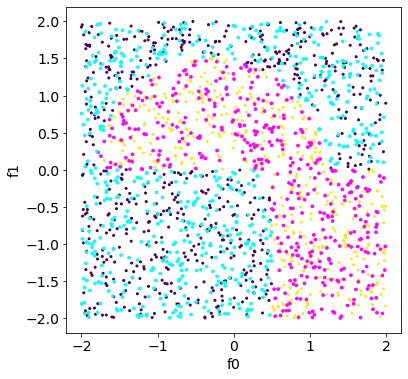

[ 0.78587674 -0.85544266] 1
[-1.09259419  0.20525908] 1
[ 0.87787588 -0.30757416] 1
[1.92305679 0.73931895] 0
[-0.07627239 -0.43152993] 0


In [4]:
def scat(x,y,s=4,cmap='viridis'):
    plt.scatter(x[:,0], x[:,1], s=s , c=y, cmap=cmap)
    plt.xlabel('f0')
    plt.ylabel('f1')

# plot both training and test set on the same figure
plt.figure(figsize=(6,6))
scat(x_train,y_train)
scat(x_test,y_test,cmap='cool',s=7)
plt.show()

for n in range(5):
    print(x[n],y[n])

We analyze three different model changing the values of the following parameters:

- gamma: minimum loss reduction required to make a split, namely cost of one leaf

- reg_lambda:  Ridge regularization coefficient on weights

- n_estimators: number of decision trees

- max_depth: maximum depth of a tree

### Model 1

[20:08:04] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


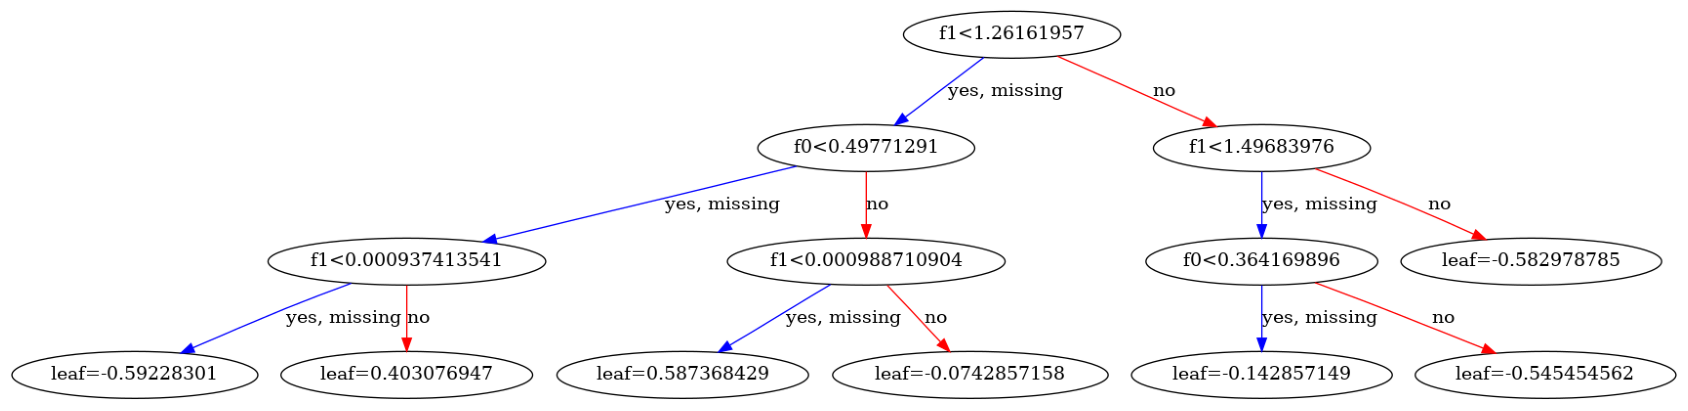

In [5]:
# reproducibility
np.random.seed(12345)

# define parameters for xgboost
params_1 = {'gamma':1, 'reg_lambda':1, 'n_estimators':1, 'max_depth':3,
        'learning_rate':0.3,'use_label_encoder':False}

# build the model with given parameters
model_1 = XGBClassifier(**params_1)

# fit the model
model_1.fit(x_train,y_train)

# plot trees
plot_trees(model_1, params_1['n_estimators'])

accuracy: 0.904


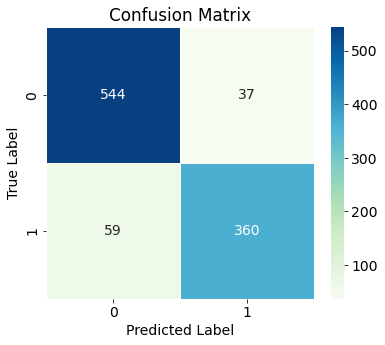

In [6]:
# predict labels on test set
y_pred = model_1.predict(x_test)

# compute accuracy
acc_test = accuracy_score(y_test,y_pred) 
print('accuracy:', acc_test)

show_confusion_matrix(y_test,y_pred)

## Model 2

In [ ]:
# reproducibility
np.random.seed(12345)

# define parameters for xgboost
params_2 = {'gamma':0.5, 'reg_lambda':0.5, 'n_estimators':2, 'max_depth':4,
        'learning_rate':0.3,'use_label_encoder':False}

# build the model with given parameters
model_2 = XGBClassifier(**params_2)

# fit the model
model_2.fit(x_train,y_train)

# plot trees
plot_trees(model_2, params_2['n_estimators'])

[20:08:05] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
# predict labels on test set
y_pred = model_2.predict(x_test)

# compute accuracy
acc_test = accuracy_score(y_test,y_pred) 
print('accuracy:', acc_test)

show_confusion_matrix(y_test,y_pred)

## Model 3

In [ ]:
# reproducibility
np.random.seed(12345)

# define parameters for xgboost
params_3 = {'gamma':0, 'reg_lambda':0, 'n_estimators':16, 'max_depth':16,
        'learning_rate':0.3,'use_label_encoder':False}

# build the model with given parameters
model_3 = XGBClassifier(**params_3)

# fit the model
model_3.fit(x_train,y_train)

# plot trees
plot_trees(model_3, 3)

In [ ]:
# predict labels on test set
y_pred = model_3.predict(x_test)

# compute accuracy
acc_test = accuracy_score(y_test,y_pred) 
print('accuracy:', acc_test)

show_confusion_matrix(y_test,y_pred)

### Conclusions:


For this classification problem we tried 3 different models of increasing complexity. 
We found that the best compromise is achieved by the second model, the third achieved slightly better accuracy but the second has a much simpler tree structure.